In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Gera um indivíduo aleatoriamente

In [74]:
tamanho_do_tabuleiro = 8
s = np.random.randint(tamanho_do_tabuleiro, size=tamanho_do_tabuleiro)
s

array([7, 1, 7, 4, 5, 2, 0, 3])

## Extrai as coordenadas

In [94]:
#---------------------------------------------------------
def extrai_coordenadas_do_individuo(ind, coordenadas_humanos=False):
#---------------------------------------------------------
    lista_coordenadas = []
    
    fator_conversao = int(coordenadas_humanos)
    
    for i in range(len(ind)):
        lista_coordenadas.append((i + fator_conversao , ind[i] + fator_conversao))
    return lista_coordenadas

In [76]:
coords_s = extrai_coordenadas_do_individuo(s)
coords_s

[(0, 7), (1, 1), (2, 7), (3, 4), (4, 5), (5, 2), (6, 0), (7, 3)]

## Gera m matriz resultante para o individuo

In [77]:
def atualiza_coordenada(vlr_coord, operacao):
    
    novo_vlr_coord = -99
    
    if (operacao == "+") | (operacao == "adicao"):
        novo_vlr_coord = vlr_coord + 1
    elif (operacao == "-") | (operacao == "subtracao"):
        novo_vlr_coord = vlr_coord - 1
    else:
        print("Operacao invalida.")
        novo_vlr_coord = -97
    
    return novo_vlr_coord


def gera_matriz_coordenada(x,y,valor_posicao_rainha=0, tamanho_tabuleiro=8):
    
    limite_inferior = 0
    limite_superior = tamanho_tabuleiro - 1
    
    m = np.zeros((tamanho_tabuleiro, tamanho_tabuleiro), dtype = int)

    lista_operacoes = ["+","-"]

    for oper_i in lista_operacoes:
        for oper_j in lista_operacoes:
            
            i = atualiza_coordenada(x,oper_i)
            j = atualiza_coordenada(y,oper_j)
            
            while (i >= limite_inferior) & (i <= limite_superior) & (j >= limite_inferior) & (j <= limite_superior):
                m[i,j] = 1
                i = atualiza_coordenada(i,oper_i)
                j = atualiza_coordenada(j,oper_j)

    m[x,:] = 1
    m[:,y] = 1
    m[x,y] = valor_posicao_rainha
    
    return m

In [78]:
def gera_matriz_resultante(coords_ind):
    
    tamanho_do_tabuleiro = len(coords_ind)
    
    mr = np.zeros((tamanho_do_tabuleiro, tamanho_do_tabuleiro), dtype = int)

    for x,y in coords_ind:
        mr = mr + gera_matriz_coordenada(x,y,valor_posicao_rainha=0)
    
    return mr

In [79]:
mr_teste = gera_matriz_resultante(coords_s)
mr_teste

array([[3, 4, 3, 2, 2, 3, 2, 3],
       [2, 0, 4, 2, 2, 3, 5, 3],
       [3, 2, 3, 4, 3, 5, 1, 2],
       [3, 2, 2, 4, 3, 2, 3, 4],
       [3, 3, 3, 5, 3, 2, 2, 3],
       [2, 4, 2, 2, 4, 4, 3, 3],
       [0, 5, 3, 5, 3, 2, 2, 5],
       [5, 3, 4, 0, 3, 2, 1, 4]])

## Conta a quantidade de ataques entre as rainhas

In [80]:
def qtde_ataques_entre_rainhas(mr, coords_ind):
    qtde_ataques = 0
    for x,y in coords_ind:
        qtde_ataques = qtde_ataques + mr[x,y]
    return qtde_ataques

In [81]:
qtde_ataques_entre_rainhas(mr_teste, coords_s)

12

In [95]:
extrai_coordenadas_do_individuo(s, True)

[(1, 8), (2, 2), (3, 8), (4, 5), (5, 6), (6, 3), (7, 1), (8, 4)]

# Calcula o fitness

In [96]:
import pandas as pd

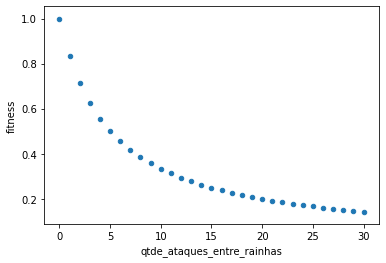

In [112]:
def fitness(qtde_ataques_entre_rainhas):
    b=0.2
    if qtde_ataques_entre_rainhas < 0:
        print("[fitness] Erro! Quantidade de ataques negativo!")
        f = -9999
    else:
        f = 1 / (1 + b*qtde_ataques_entre_rainhas)
        
    return f

lista_f = []
lista_q = []

for q in range(31):
    lista_q.append(q)
    lista_f.append(fitness(q))

arr_q = np.array(lista_q)
arr_f = np.array(lista_f)

df_fitness = pd.DataFrame({"qtde_ataques_entre_rainhas": lista_q, "fitness": lista_f})
df_fitness.plot(kind="scatter",x="qtde_ataques_entre_rainhas",y="fitness")

# A função evaluate_fn

In [1]:
import numpy as np

### Funções auxiliares

In [2]:
def extrai_coordenadas_do_individuo(ind):
    lista_coordenadas = []
    for i in range(len(ind)):
        lista_coordenadas.append((i,ind[i]))
    return lista_coordenadas


def atualiza_coordenada(vlr_coord, operacao):
    
    novo_vlr_coord = -99
    
    if (operacao == "+") | (operacao == "adicao"):
        novo_vlr_coord = vlr_coord + 1
    elif (operacao == "-") | (operacao == "subtracao"):
        novo_vlr_coord = vlr_coord - 1
    else:
        print("Operacao invalida.")
        novo_vlr_coord = -97
    
    return novo_vlr_coord


def gera_matriz_coordenada(x,y,valor_posicao_rainha=0, tamanho_tabuleiro=8):
    
    limite_inferior = 0
    limite_superior = tamanho_tabuleiro - 1
    
    m = np.zeros((tamanho_tabuleiro, tamanho_tabuleiro), dtype = int)

    lista_operacoes = ["+","-"]

    for oper_i in lista_operacoes:
        for oper_j in lista_operacoes:
            
            i = atualiza_coordenada(x,oper_i)
            j = atualiza_coordenada(y,oper_j)
            
            while (i >= limite_inferior) & (i <= limite_superior) & (j >= limite_inferior) & (j <= limite_superior):
                m[i,j] = 1
                i = atualiza_coordenada(i,oper_i)
                j = atualiza_coordenada(j,oper_j)

    m[x,:] = 1
    m[:,y] = 1
    m[x,y] = valor_posicao_rainha
    
    return m

def gera_matriz_resultante(coords_ind):
    
    tamanho_do_tabuleiro = len(coords_ind)
    
    mr = np.zeros((tamanho_do_tabuleiro, tamanho_do_tabuleiro), dtype = int)

    for x,y in coords_ind:
        mr = mr + gera_matriz_coordenada(x,y,valor_posicao_rainha=0)
    
    return mr

def qtde_ataques_entre_rainhas(mr, coords_ind):
    qtde_ataques = 0
    for x,y in coords_ind:
        qtde_ataques = qtde_ataques + mr[x,y]
    return qtde_ataques


def fitness(qtde_ataques_entre_rainhas):
    b=0.2
    if qtde_ataques_entre_rainhas < 0:
        print("[fitness] Erro! Quantidade de ataques negativo!")
        f = -9999
    else:
        f = 1 / (1 + b*qtde_ataques_entre_rainhas)
        
    return f

def evaluate_fn(ind):
    coords_ind = extrai_coordenadas_do_individuo(ind)
    mr_teste = gera_matriz_resultante(coords_ind)
    q = qtde_ataques_entre_rainhas(mr_teste, coords_ind)
    ind_fitness = fitness(q)
    return ind_fitness, 

In [5]:
tamanho_do_tabuleiro = 8
for i in range(10):
    w = np.random.randint(tamanho_do_tabuleiro, size=tamanho_do_tabuleiro)
    print(w, extrai_coordenadas_do_individuo(w), evaluate_fn(w))

[7 2 2 0 6 6 6 7] [(0, 7), (1, 2), (2, 2), (3, 0), (4, 6), (5, 6), (6, 6), (7, 7)] (0.2,)
[2 7 5 6 7 3 6 3] [(0, 2), (1, 7), (2, 5), (3, 6), (4, 7), (5, 3), (6, 6), (7, 3)] (0.2631578947368421,)
[1 2 3 5 5 0 0 5] [(0, 1), (1, 2), (2, 3), (3, 5), (4, 5), (5, 0), (6, 0), (7, 5)] (0.18518518518518517,)
[7 5 6 0 1 4 7 4] [(0, 7), (1, 5), (2, 6), (3, 0), (4, 1), (5, 4), (6, 7), (7, 4)] (0.2941176470588235,)
[0 5 6 5 4 3 2 3] [(0, 0), (1, 5), (2, 6), (3, 5), (4, 4), (5, 3), (6, 2), (7, 3)] (0.14285714285714285,)
[3 2 1 6 1 7 7 3] [(0, 3), (1, 2), (2, 1), (3, 6), (4, 1), (5, 7), (6, 7), (7, 3)] (0.23809523809523808,)
[1 7 5 2 2 7 7 6] [(0, 1), (1, 7), (2, 5), (3, 2), (4, 2), (5, 7), (6, 7), (7, 6)] (0.2631578947368421,)
[7 5 7 6 3 7 0 6] [(0, 7), (1, 5), (2, 7), (3, 6), (4, 3), (5, 7), (6, 0), (7, 6)] (0.23809523809523808,)
[0 1 0 7 1 4 1 1] [(0, 0), (1, 1), (2, 0), (3, 7), (4, 1), (5, 4), (6, 1), (7, 1)] (0.2173913043478261,)
[5 4 7 1 7 6 6 1] [(0, 5), (1, 4), (2, 7), (3, 1), (4, 7), (5, 6),